In [193]:
import numpy as np
import matplotlib.pyplot as plt

In [194]:
def f(L):
    Step_Length = 1e-3
    current_data = np.arange(0, L + Step_Length, Step_Length)
    next_data = current_data.copy()
    
    while True:
        last_begin = 0
        for agent in range(0,len(current_data)):
            current_num = current_data[agent]
            
            if agent != 0 and current_num == current_data[agent-1]:
                next_data[agent] = next_data[agent-1]
                continue
            
            diff = abs(current_data - current_num)
            
            begin = last_begin
            while diff[begin] >= 1 and begin < agent:
                begin += 1
            last_begin = begin
            
            end = agent + 1
            while end < len(current_data) and diff[end] < 1:
                end += 1
            
            s = current_data[begin:end].sum()
            next_data[agent] = round(s / (end - begin),2)
            
        if  np.array_equal(next_data, current_data):
            break
        current_data = next_data.copy()
    
    return current_data

In [195]:
def g(origin_data, ret_data,fre):
    count = 0
    while count < fre:
        last_begin = 0
        for agent in range(0,len(origin_data)):
            current_num = ret_data[agent][count]
            
            if agent != 0 and current_num == ret_data[agent-1][count]:
                ret_data[agent][count+1] = ret_data[agent-1][count+1]
                continue
            
            diff = abs(ret_data[:,count] - current_num)
            
            begin = last_begin
            while diff[begin] >= 1 and begin < agent:
                begin += 1
            last_begin = begin
            
            end = agent + 1
            while end < len(origin_data) and diff[end] < 1:
                end += 1
            
            s = ret_data[begin:end,count].sum()
            ret_data[agent][count+1] = round(s / (end - begin),2)
            
        count += 1
    
    return ret_data

In [196]:
def scope(start,L,Step_Length,fre):
    origin_data = np.arange(start, L + Step_Length, Step_Length)
    
    point = int((L - start)/ Step_Length) + 1
    ret_data = np.zeros((point,fre + 1))
    
    ret_data[:,0] = origin_data
    
    return origin_data, ret_data

In [212]:
x = np.arange(3.8,25,1/100)
fig = plt.figure(figsize=(4, 2), dpi=300)
all_xy = []

for i in range(len(x)):
    target = round(x[i], 2)
    y = f(target) - target/2
    y = np.unique(y)
    print(target)
    xy = [[x[i], yi] for yi in y]
    all_xy.extend(xy)
    
all_xy = np.array(all_xy)
plt.scatter(all_xy[:, 0], all_xy[:, 1], s=0.05, c="blue")

plt.xlabel('L')
plt.ylabel('x-L/2')
plt.tick_params(axis='y', which='both', left=True, labelright=False,direction='in')

plt.grid()
plt.show()

3.8
3.81
3.82
3.83
3.84
3.85
3.86
3.87


KeyboardInterrupt: 

<Figure size 1200x600 with 0 Axes>

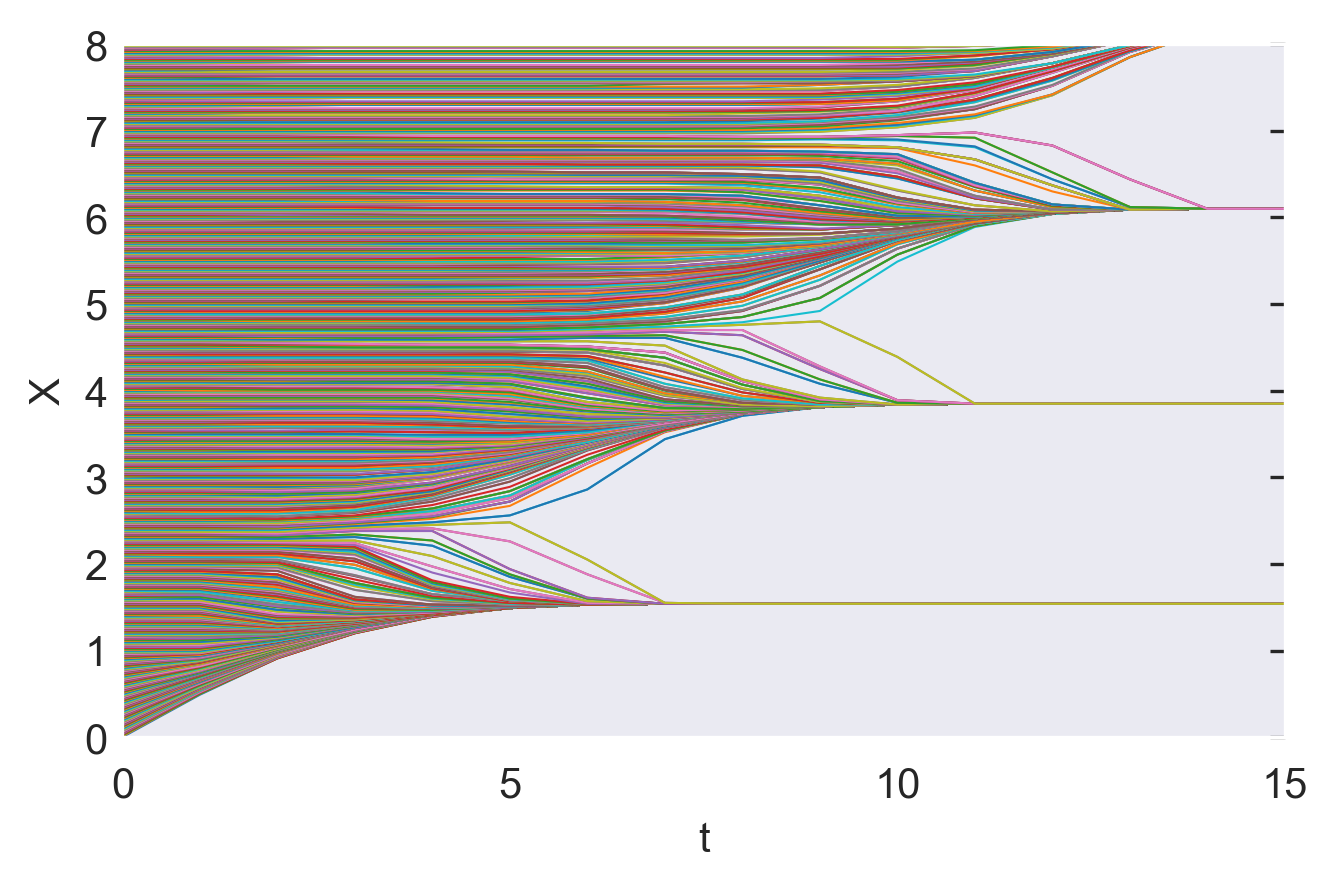

In [200]:
x = range(16)
fig = plt.figure(figsize=(5, 3), dpi=400)

origin_data,ret_data = scope(0,28,0.01,15)
data = g(origin_data,ret_data,15) 

for i in range(data.shape[0]):
    y = data[i,:]
    plt.plot(x, y,linewidth=0.5)

plt.xlabel('t')
plt.ylabel('X')
plt.ylim(0,8)
plt.xlim(0,15)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=9)
plt.tick_params(axis='y', which='both', right=True, labelright=False,direction='in')

plt.grid()
plt.show()

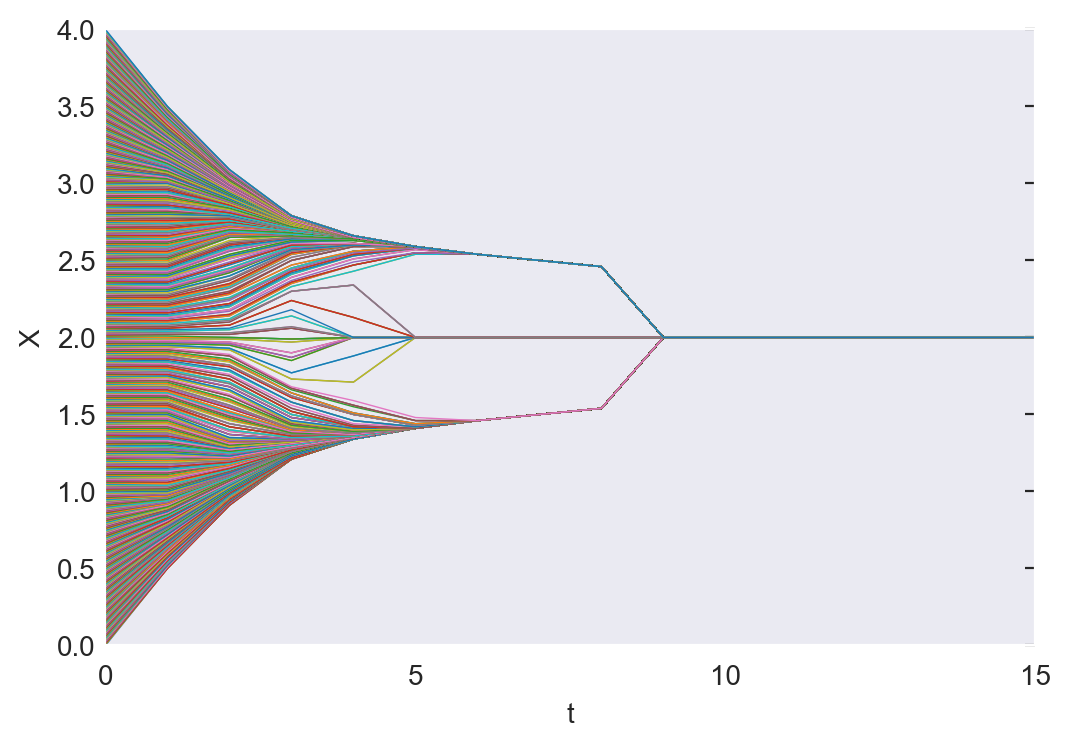

In [205]:
x = range(16)
fig = plt.figure(figsize=(6, 4), dpi=500)

origin_data,ret_data = scope(0,4,0.005,15)
data = g(origin_data,ret_data,15) 

for i in range(data.shape[0]):
    y = data[i,:]
    plt.plot(x, y,linewidth=0.5)

plt.xlabel('t')
plt.ylabel('X')
plt.ylim(0,4)
plt.xlim(0,15)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=9)
plt.tick_params(axis='y', which='both', right=True, labelright=False,direction='in')

plt.grid()
plt.show()

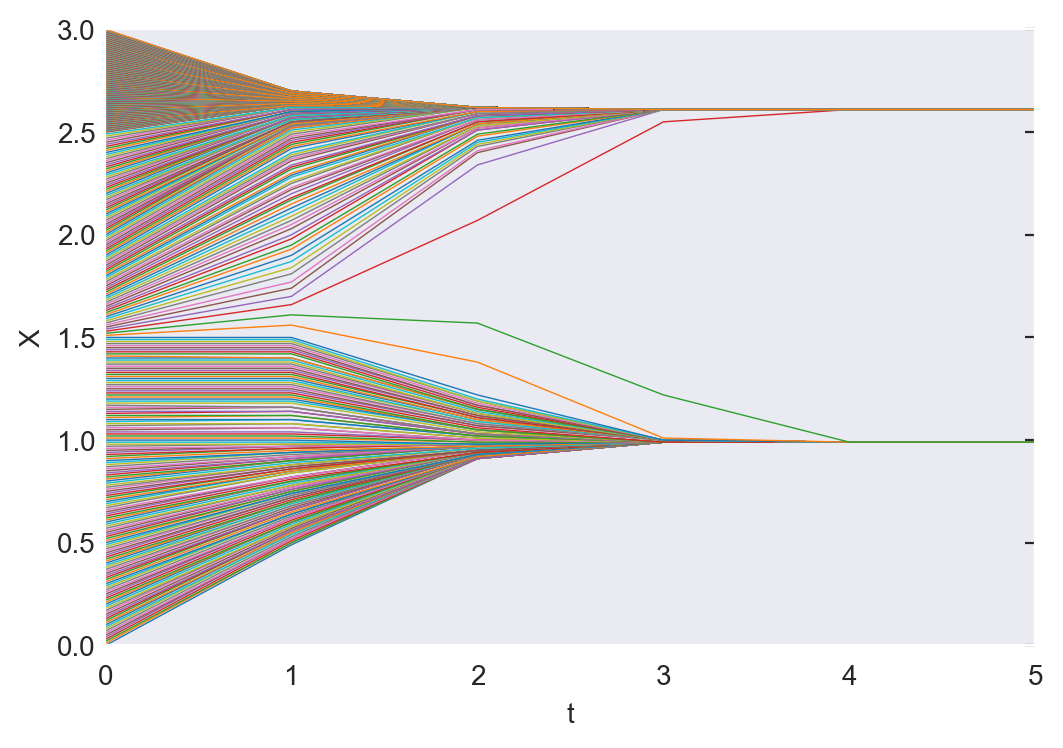

In [211]:
x = range(6)
fig = plt.figure(figsize=(6, 4), dpi=500)

origin_data,ret_data = scope(0,2.5,0.01,5)
tmp1,tmp2 = scope(2.5,3,0.001,5)
origin_data = np.concatenate((origin_data,tmp1),axis=0)
ret_data = np.concatenate((ret_data,tmp2),axis=0)

data = g(origin_data,ret_data,5)
for i in range(data.shape[0]):
    y = data[i,:]
    plt.plot(x, y,linewidth=0.5)

plt.xlabel('t')
plt.ylabel('X')
plt.ylim(0,3)
plt.xlim(0,5)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='y', nbins=7)
plt.tick_params(axis='y', which='both', right=True, labelright=False,direction='in')

plt.grid()
plt.show()